In [1]:
import iss
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x = np.sin(np.linspace(0, 2*np.pi, 100))

sums = iss.iss(x, iss.Word("[1][1]"))

In [12]:
x = np.array([1,2,3,4,5]).reverse()

In [11]:
iss.iss(x, iss.Word("[1^2]"), semiring=iss.semiring.Arctic())

array([ 2,  4,  6,  8, 10])

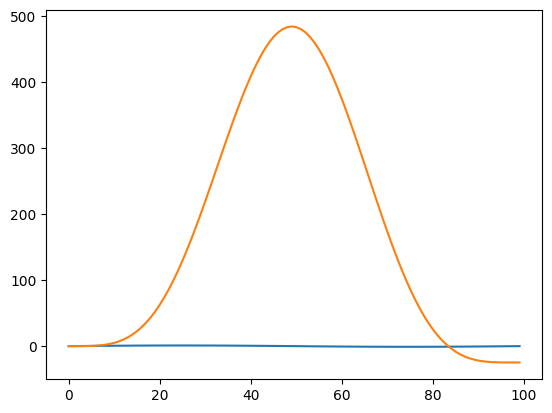

In [3]:
plt.plot(x)
plt.plot(sums)

In [1]:
import re
# FORMAT = re.compile(r"(\[(-?\d|\(-?\d+\))(\^(-?\d+|\(-?\d+\)))?\])+")
FORMAT = re.compile(r"(?:(-?\d)|\((-?\d+)\))(?:\^(?:(-?\d)|\((-?\d+)\)))?")
FULLFORMAT = re.compile(r"(\[(((-?\d)|\((-?\d+)\))(\^((-?\d)|\((-?\d+)\)))?)+\])+")


In [12]:
print(FULLFORMAT.fullmatch("[(-13)^(-2)][1^(25)3][]"))

None


In [3]:
iss.Word("[1^21^(-2)]")

Word([])

In [3]:
FULLFORMAT.findall("feff")

NameError: name 'FULLFORMAT' is not defined

In [1]:
import iss

word = iss.Word("[(12)^(-2)334^54][1^(23)334]")

In [3]:
str(word)

'[(12)^(-2)3^24^6][1^(23)3^24]'

In [8]:
list(zip(*word._letters[0]))

[(12, 3, 4), (-2, 2, 6)]

In [2]:
word.numpy()

array([[ 0.,  0.,  2.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.],
       [23.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [6]:
str(word)

'[(12)^(-2)3^24^6][1^(23)3^24]'

In [7]:
str("[1222]"*word)

'[12^3][(12)^(-2)3^24^6][1^(23)3^24]'

In [13]:
word = iss.Word("[1][2][3][4]")
word.deconcat()

[(Word([]), Word([1][2][3][4])),
 (Word([1]), Word([2][3][4])),
 (Word([1][2]), Word([3][4])),
 (Word([1][2][3]), Word([4])),
 (Word([1][2][3][4]), Word([]))]

In [2]:
import numpy as np
x = np.random.random((1000, 4))

In [28]:
array = np.zeros((len(word)+1,))
for i, w in enumerate(word.deconcat()):
    array[i] = iss.iss(x[:500], w[0])[-1] * iss.iss(x[500:], w[1])[-1]

In [35]:
iss.iss(x, word)[-1], array.sum(axis=0)

(np.float64(2608916943.0081983), np.float64(2608916943.008198))

In [2]:
iss.words.of_weight(3, 4)

(Word([1^3]),
 Word([1^22]),
 Word([1^23]),
 Word([1^24]),
 Word([12^2]),
 Word([123]),
 Word([124]),
 Word([13^2]),
 Word([134]),
 Word([14^2]),
 Word([2^3]),
 Word([2^23]),
 Word([2^24]),
 Word([23^2]),
 Word([234]),
 Word([24^2]),
 Word([3^3]),
 Word([3^24]),
 Word([34^2]),
 Word([4^3]),
 Word([1][1^2]),
 Word([1][12]),
 Word([1][13]),
 Word([1][14]),
 Word([1][2^2]),
 Word([1][23]),
 Word([1][24]),
 Word([1][3^2]),
 Word([1][34]),
 Word([1][4^2]),
 Word([2][1^2]),
 Word([2][12]),
 Word([2][13]),
 Word([2][14]),
 Word([2][2^2]),
 Word([2][23]),
 Word([2][24]),
 Word([2][3^2]),
 Word([2][34]),
 Word([2][4^2]),
 Word([3][1^2]),
 Word([3][12]),
 Word([3][13]),
 Word([3][14]),
 Word([3][2^2]),
 Word([3][23]),
 Word([3][24]),
 Word([3][3^2]),
 Word([3][34]),
 Word([3][4^2]),
 Word([4][1^2]),
 Word([4][12]),
 Word([4][13]),
 Word([4][14]),
 Word([4][2^2]),
 Word([4][23]),
 Word([4][24]),
 Word([4][3^2]),
 Word([4][34]),
 Word([4][4^2]),
 Word([1^2][1]),
 Word([1^2][2]),
 Word([1^2][3]),
 

In [7]:
import timeit

timeit.timeit(lambda: iss.iss(np.random.random((10000, 1)), iss.Word('[1][1][1]')), number=10000)

2.0411203000003297

In [8]:
import timeit

timeit.timeit(lambda: iss.iss(np.random.random((10000, 1)), iss.Word('[1][1][1]')), number=10000)

1.8859054999993532

In [65]:
timeit.timeit(lambda: iss.iss(np.random.random((10000, 1)), iss.Word('[1][1][1]'), weighting=iss.weighting.Exponential((0, 0, 0))), number=10000)

4.811156300000221

In [77]:
def time_iss():
    x = np.random.random((10000, 1))
    word = iss.Word(3*"[1]")
    iss.iss(x, word)

def time_iss_partial():
    x = np.random.random((10000, 1))
    word = iss.Word(3*"[1]")
    iss.iss(x, word, partial=True)

print("sequential:", timeit.timeit(time_iss, number=10000))
print("partial:", timeit.timeit(time_iss_partial, number=10000))

sequential: 2.3995240000003832
partial: 2.0156124999994063
